In [2]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
transform = transforms.ToTensor()
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 262383475.61it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 111235715.17it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 147196734.99it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20137979.67it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:

num_workers = 0

batch_size = 20

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

In [4]:
#CODE I FOUND ON GOOGLE <JUST KEPT FOR REFERENCE JUST IN CASE>
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torchvision
# import torchvision.transforms as transforms

# # Define the CNN architecture
# class CNN(nn.Module):
#     def __init__(self):
#         super(CNN, self).__init__()

#         # Define the convolutional layers
#         self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
#         self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)

#         # Define the pooling layers
#         self.pool1 = nn.MaxPool2d(2, 2)
#         self.pool2 = nn.MaxPool2d(2, 2)

#         # Define the fully connected layers
#         self.fc1 = nn.Linear(64 * 7 * 7, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 10)

#     def forward(self, x):
#         # Perform the forward pass through the network

#         x = self.pool1(F.relu(self.conv1(x)))
#         x = self.pool2(F.relu(self.conv2(x)))
#         x = x.view(-1, 64 * 7 * 7)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)

#         return x

# # Define the loss function and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(cnn.parameters(), lr=0.01)

# # Train the CNN
# for epoch in range(10):
#     for i, data in enumerate(train_loader, 0):
#         # Get the inputs
#         inputs, labels = data

#         # Forward pass
#         outputs = cnn(inputs)

#         # Calculate the loss
#         loss = criterion(outputs, labels)

#         # Backward pass
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         # Print the progress
#         if i % 2000 == 1999:
#             print('[%d, %5d] loss: %.3f' %
#                   (epoch + 1, i + 1, loss.data[0]))

# # Test the CNN
# correct = 0
# total = 0
# for data in test_loader, 0:
#     images, labels = data

#     outputs = cnn(images)
#     _, predicted = torch.max(outputs.data, 1)
#     total += labels.size(0)
#     correct += (predicted == labels).sum().item()

# print('Accuracy of the network on the 10000 test images: %d %%' % (
#     100 * correct / total))

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms


In [6]:
import torch.nn.functional as F

In [7]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)

        self.pool1 = nn.MaxPool2d(2, 2)
        self.pool2 = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(64 * 7 * 7, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):

        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


CNN_model = CNN()

In [8]:
import torch.optim as optim


CNN_model = CNN()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(CNN_model.parameters(), lr=0.01)


num_epochs = 5
for epoch in range(num_epochs):
    CNN_model.train()
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader, 0):
        optimizer.zero_grad()

        outputs = CNN_model(images)

        if outputs is not None:
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        else:
            continue

    print(f'epoch [{epoch + 1}/{num_epochs}], loss: {running_loss / len(train_loader)}')




epoch [1/5], loss: 0.7376773443518129
epoch [2/5], loss: 0.15223026029608444
epoch [3/5], loss: 0.09287840060321226
epoch [4/5], loss: 0.07056839681317312
epoch [5/5], loss: 0.057547689221707214


In [9]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data


        outputs = CNN_model(inputs)


        _, predicted = torch.max(outputs.data, 1)


        total += labels.size(0)


        correct += (predicted == labels).sum().item()

print(f'the accuracy is{ (correct / total)*100}')

the accuracy is98.14


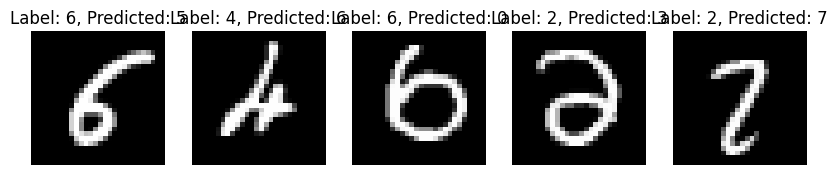

In [10]:
import matplotlib.pyplot as plt
import numpy as np


CNN_model.eval()


mis_images = []
mis_labels = []
mis_pred = []


with torch.no_grad():
    for data in test_loader:
        inputs, labels = data

        outputs = CNN_model(inputs)


        _, predicted = torch.max(outputs.data, 1)


        misclassified_mask = predicted != labels
        mis_images.extend(inputs[misclassified_mask])
        mis_labels.extend(labels[misclassified_mask])
        mis_pred.extend(predicted[misclassified_mask])

mis_images = torch.stack(mis_images)
mis_labels = torch.stack(mis_labels)
mis_pred = torch.stack(mis_pred)

def show_misclassified(images, labels, predictions, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 2))
    for i in range(num_images):
        ax = axes[i]
        ax.imshow(images[i].squeeze(), cmap='gray')
        ax.set_title(f'Label: {labels[i]}, Predicted: {predictions[i]}')
        ax.axis('off')
    plt.show()

show_misclassified(mis_images, mis_labels, mis_pred)
